# **1. Data Exploration and Preprocessing:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
# Display the first few rows of the dataset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
#info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


The dataset contains information about users, including their gender, age, estimated salary, and whether they purchased a product (Purchased).
User ID: Unique identifier for each user.
Gender: Gender of the user (Male or Female).
Age: Age of the user.
EstimatedSalary: Estimated salary of the user.
Purchased: Binary variable indicating whether the user purchased the product (0 for not purchased, 1 for purchased).

**Data Preprocessing:**

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


It appears that there are no missing values in the dataset.

In [7]:
from scipy.stats import chi2_contingency
ct=pd.crosstab(data.Purchased,data.Gender)
c,p,df,ex=chi2_contingency(ct)
print(c)
print(p)

0.5550869364098915
0.45624659183130645


Based on the ct There is no significant relation between Gender and Purchases

In [8]:
ct

Gender,Female,Male
Purchased,,
0,127,130
1,77,66


In [10]:
salarybins=[15000,30000,45000,60000,75000,90000,150000]
salarylabels=['1','2','3','4','5','6']
data['Salarygroup']=pd.cut(data['EstimatedSalary'],bins=salarybins,labels=salarylabels)

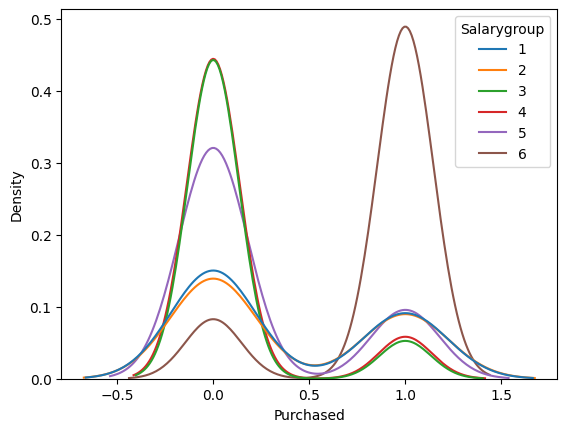

In [11]:
sns.kdeplot(data=data,x='Purchased',hue='Salarygroup')
plt.show()

In [12]:

bins=[18,25,40,50,60]
labels=['1','2','3','4']
data['Agegroup']=pd.cut(data['Age'],bins=bins,labels=labels)

<ipython-input-13-299caa49f904>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data,x='Purchased',hue='Agegroup')


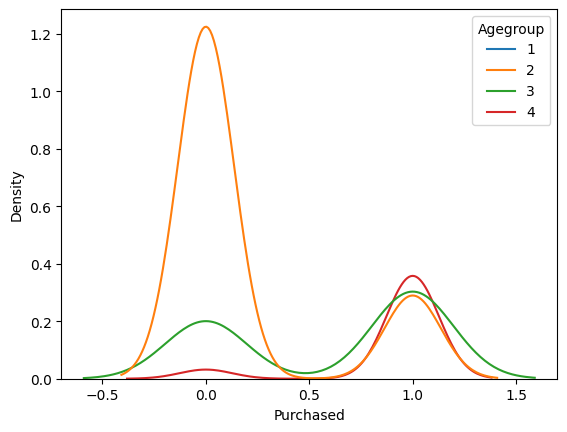

In [13]:
sns.kdeplot(data=data,x='Purchased',hue='Agegroup')
plt.show()

# **2.Encoding categorical variables and splitting the dataset into features and the target variable.**

**Define features (X) and target variable (y)**

**Encoding Categorical value**

In [14]:
# Encode categorical variable 'Gender' using one-hot encoding
# Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data


,User ID,Gender,Age,EstimatedSalary,Purchased,Salarygroup,Agegroup
0,15624510,1,19,19000,0,1,1
1,15810944,1,35,20000,0,1,2
2,15668575,0,26,43000,0,2,2
3,15603246,0,27,57000,0,3,2
4,15804002,1,19,76000,0,5,1
...,...,...,...,...,...,...,...
395,15691863,0,46,41000,1,2,3
396,15706071,1,51,23000,1,1,4
397,15654296,0,50,20000,1,1,3
398,15755018,1,36,33000,0,2,2


In [15]:
# Split the dataset into features (X) and target variable (y)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [16]:
# Display the first few rows of X and y
print("Features (X):\n", X.head())
print("\nTarget variable (y):\n", y.head())

Features (X):
    Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000

Target variable (y):
 0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


# **3.Model training and evaluation.**

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (320, 2)
y_train shape: (320,)
X_test shape: (80, 2)
y_test shape: (80,)


Training multiple machine learning models on the training data and evaluating their performance using appropriate metrics.

We can start by training the following models:

 1.Logistic RegressiON

 2.Decision Tree

3.Random ForesT

4.Support Vector Machine (SVM)

In [18]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [19]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [20]:
# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.6500
Recall: 0.0000
F1-score: 0.0000

Model: Decision Tree
Accuracy: 0.8375
Recall: 0.7500
F1-score: 0.7636

Model: Random Forest
Accuracy: 0.9000
Recall: 0.9286
F1-score: 0.8667

Model: Support Vector Machine
Accuracy: 0.7375
Recall: 0.3571
F1-score: 0.4878



Based on these results:

Random Forest achieves the highest accuracy, recall, and F1-score among the tested models.

Decision Tree also performs well, with high recall and F1-score.

Logistic Regression and Support Vector Machine achieve lower performance compared to the ensemble models (Random Forest and Decision Tree).

# **Building the Flask web application.**

In [21]:
import pickle

# Serialize the trained Random Forest model
with open("model.pkl", "wb") as file:
    pickle.dump(models["Random Forest"], file)


In [22]:
models['Random Forest']

RandomForestClassifier(random_state=42)

In [23]:
pickled_model = pickle.load(open("model.pkl",'rb'))